Principal Component Analysis
===

An iris is a family of flowers which can be classified into species depending on the length and width of its petals and sepals. Our goal is to reduce the classifications to two instead of four using PCA

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape

print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


This says that we have a data set of 150 samples (individual flowers). We have dimensions/features and three distrinct iris species

In [17]:
X = iris.data
pca = PCA(n_components = 2, whiten = True).fit(X) #'whiten = True' to normalize data
X_pca = pca.transform(X)

What happened was we distilled our 4D dataset to 2D by projecting it down to two orthogonal 4D vectors that make up the basis of our new 2D projection

In [18]:
print(pca.components_) #eigenvectors of the two eigenvalues

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


How much info have we preserved

In [19]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


This means we preserved 97% of the variance in the current 2D instead of 4D. Probably because instead of looking at the length and width independently, we should look at the ratio

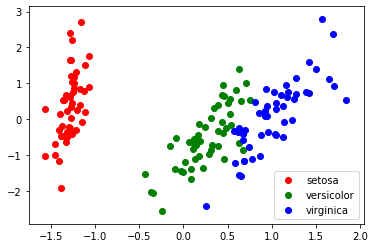

In [20]:
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i,0], X_pca[iris.target == i, 1], c = c, label = label)
pl.legend()
pl.show()